# Initializing Notebook

In [ ]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib as plt
print('matplotlib: {}'.format(plt.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import glob
#print('glob: {}'.format(glob.__version__))
import os

import seaborn as sns

import pickle

Python: 3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0]
scipy: 1.11.4
numpy: 1.25.2
matplotlib: 3.7.1
pandas: 2.0.3
sklearn: 1.2.2


In [ ]:
from google.colab import files
from pandas import read_csv
from pandas import read_json
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn import preprocessing
from re import sub
from pathlib import Path
from decimal import Decimal

In [ ]:
!pip install lbl2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 MB 8.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

In [ ]:
#Upload kaggle.json file for API authentication
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
#Main Dataset
df2 = pd.read_csv("output(=5).csv", sep= ';', encoding_errors="ignore")
df2.head()

,input_id,link,title,category,address,open_hours,popular_times,website,phone,plus_code,...,complete_address,about,user_reviews,emails,MerchantName,TotalTransaction,PostalCode,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal
0,a9ee9633-2fd6-457d-90ea-fc627da55dbf,NaN,Kopi Pujaan Bintaro Plaza,Coffee shop,"Jl. Bintaro Utama 3A No.48 Blok D, Pd. Karya, ...","{""Friday"":[""9.30â€¯amâ€“9.30â€¯pm""],""Monday"":[...",{},https://kopipujaan.wordpress.com/,0878-8219-2408,"PPGR+XM Pondok Karya, South Tangerang City, Ba...",...,"{""borough"":""Pondok Karya, Pondok Aren"",""street...","[{""id"":""service_options"",""name"":""Service optio...","[{""Name"":""AR"",""ProfilePicture"":""https://lh3.go...",NaN,Kopi Pujaan Bintaro Plaza,15225,69,1772000,24,447000
1,69ec5b97-d3fe-4007-a895-2f211b959917,NaN,R77 Carwash & Cafe,Car wash,"Jl. Wana Kencana, Blok R77, Sektor 12, Kencana...","{""Friday"":[""7.00â€¯amâ€“8.30â€¯pm""],""Monday"":[...","{""Friday"":{""10"":55,""11"":50,""12"":50,""13"":52,""14...",https://r77carwashcafe.wixsite.com/r77carwash-...,0812-9450-2760,"MMGR+M6 Ciater, South Tangerang City, Banten",...,"{""borough"":""Ciater, Serpong Sub-District"",""str...","[{""id"":""payments"",""name"":""Payments"",""options"":...","[{""Name"":""bib"",""ProfilePicture"":""https://lh3.g...",NaN,R77 CARWASH & CAFE,15318,130,6458500,41,2248000
2,72a1ce41-5c5a-4a6e-9c59-86db6124220d,NaN,Kwetiau Medan Alex,Restaurant,"East Pondok Jagung, Serpong Utara, South Tange...","{""Friday"":[""7.30â€¯amâ€“5.00â€¯pm""],""Monday"":[...",{},NaN,0813-6109-4158,"PMR5+F2 East Pondok Jagung, South Tangerang Ci...",...,"{""borough"":""East Pondok Jagung, Serpong Utara""...","[{""id"":""service_options"",""name"":""Service optio...","[{""Name"":""agustino widjaja"",""ProfilePicture"":""...",NaN,KWETIAU MEDAN ALEX,15325,37,930000,7,186000
3,c87c29a9-6f97-4836-9528-65380e322320,NaN,GUARDIAN - Living World 2,Health and beauty shop,"Mall Living World, UG-02, Jl. Alam Sutera Boul...","{""Friday"":[""10.00â€¯amâ€“9.00â€¯pm""],""Monday"":...","{""Friday"":{""10"":21,""11"":47,""12"":21,""13"":8,""14""...",http://guardianindonesia.co.id/,(021) 29239536,"QM43+7C Pakulonan, South Tangerang City, Banten",...,"{""borough"":""Pakulonan, Serpong Utara"",""street""...","[{""id"":""service_options"",""name"":""Service optio...","[{""Name"":""Asria Avicenna"",""ProfilePicture"":""ht...",NaN,GUARDIAN Living World 2,15325,15,1213000,5,630500
4,59e64974-5c3f-4395-ae04-b5c56a8bc844,NaN,Anugrah Cell,Cell phone store,Jalan Matahari Rt 002 Rw 006 # 25 Sudimara Pin...,"{""Friday"":[""8.00â€¯amâ€“9.30â€¯pm""],""Monday"":[...","{""Friday"":{""10"":54,""11"":36,""12"":18,""13"":9,""14""...",NaN,0812-8014-3393,"QMCQ+XW Sudimara Pinang, Tangerang City, Banten",...,"{""borough"":""Sudimara Pinang, Pinang"",""street"":...","[{""id"":""service_options"",""name"":""Service optio...","[{""Name"":""Shiang Anugrah"",""ProfilePicture"":""ht...",NaN,ANUGRAH CELL CIPADU,15155,246,30210000,93,11741000


In [ ]:
#Location Dataset
df_loc = pd.read_csv("public places.csv", sep= ';', encoding_errors="ignore")
df_loc.head()

,input_id,link,title,category,address,open_hours,popular_times,website,phone,plus_code,...,data_id,images,reservations,order_online,menu,owner,complete_address,about,user_reviews,emails
0,8724170e-0e82-423b-a2d3-f3eec2bb88ef,NaN,Oliander Park,Park,"No., Jl. Oliander 2 Blok X No.17, Rw. Buntu, K...","{""Friday"":[""7.00â€¯amâ€“2.00â€¯pm"",""4.00â€“7.0...",{},NaN,NaN,"MMXJ+G5 Rawa Buntu, South Tangerang City, Banten",...,0x2e69fad45f6de215:0x83e32f6bfba006a3,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":"""",""name"":""Oliander Park (Owner)"",""link""...","{""borough"":""Rawa Buntu, Serpong Sub-District"",...","[{""id"":""children"",""name"":""Children"",""options"":...",NaN,NaN
1,8724170e-0e82-423b-a2d3-f3eec2bb88ef,NaN,Maruga Pond Park,Park,"Ciater, Serpong Sub-District, South Tangerang ...","{""Friday"":[""8.00â€¯amâ€“4.30â€¯pm""],""Monday"":[...",{},NaN,NaN,"MMPX+JC Ciater, South Tangerang City, Banten",...,0x2e69e53bbf85a5fb:0xaa127ba0fc295ebc,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":""112872614432671525719"",""name"":""Maruga P...","{""borough"":""Ciater, Serpong Sub-District"",""str...","[{""id"":""accessibility"",""name"":""Accessibility"",...",NaN,NaN
2,8724170e-0e82-423b-a2d3-f3eec2bb88ef,NaN,Kebayoran Park Bintaro,Park,"PPJ6+5J8 Kebayoran Park Bintaro, Jl. Kby. Resi...","{""Friday"":[""6.00â€¯amâ€“10.00â€¯pm""],""Monday"":...","{""Friday"":{""10"":22,""11"":19,""12"":19,""13"":20,""14...",NaN,NaN,NaN,...,0x2e69fa8f79b16b4d:0x421d9e8b38748a9a,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":"""",""name"":""Kebayoran Park Bintaro (Owner...","{""borough"":""Pondok Jaya, Pondok Aren"",""street""...","[{""id"":""amenities"",""name"":""Amenities"",""options...",NaN,NaN
3,8724170e-0e82-423b-a2d3-f3eec2bb88ef,NaN,Pelikan Park,Park,"PQF3+HJF Pelikan Park, Jl. Pelikan VI, Rengas,...","{""Friday"":[""Open 24 hours""],""Monday"":[""Open 24...","{""Friday"":{""0"":54,""1"":31,""10"":22,""11"":18,""12"":...",NaN,NaN,NaN,...,0x2e69f18fe3c6e95f:0x9abd9b3c2697eaff,"[{""title"":""All"",""image"":""https://streetviewpix...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":"""",""name"":""Pelikan Park (Owner)"",""link"":""""}","{""borough"":""Rengas, Ciputat Timur"",""street"":""P...","[{""id"":""children"",""name"":""Children"",""options"":...",NaN,NaN
4,8724170e-0e82-423b-a2d3-f3eec2bb88ef,NaN,Taman Althia,Park,"Jl. Althia VII No.29, Parigi Baru, Kec. Pd. Ar...",{},"{""Friday"":{""0"":10,""1"":0,""10"":10,""11"":0,""12"":10...",NaN,NaN,"PMQQ+56 Parigi Baru, South Tangerang City, Banten",...,0x2e69fa5802a1a119:0x70145ed05981a9a4,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":"""",""name"":""Taman Althia (Owner)"",""link"":""""}","{""borough"":""Parigi Baru, Pondok Aren"",""street""...","[{""id"":""children"",""name"":""Children"",""options"":...",NaN,NaN


# Notes:

In [ ]:
df2.columns

Index(['input_id', 'link', 'title', 'category', 'address', 'open_hours',
       'popular_times', 'website', 'phone', 'plus_code', 'review_count',
       'review_rating', 'reviews_per_rating', 'latitude', 'longitude', 'cid',
       'status', 'descriptions', 'reviews_link', 'thumbnail', 'timezone',
       'price_range', 'data_id', 'images', 'reservations', 'order_online',
       'menu', 'owner', 'complete_address', 'about', 'user_reviews', 'emails',
       'MerchantName', 'TotalTransaction', 'PostalCode',
       'TotalNominalTransaction', 'Last1MonthTransaction', 'Last1MothNominal'],
      dtype='object')

# Category Preprocessing

Note: Yang akhirnya dipakai yang Keywords (semi-manual)

In [ ]:
# df2 = df2[df2["address"].notna()]
df2.shape

(3959, 38)

In [ ]:
category_distribution = df2["category"].value_counts().sort_values(ascending=False)
for category in category_distribution.index:
  print(category, ":", category_distribution[category])

Restaurant : 452
Coffee shop : 173
Indonesian restaurant : 156
Nasi goreng restaurant : 148
Cafe : 142
Padang restaurant : 104
Noodle shop : 94
Tegal restaurant : 89
Bakso restaurant : 86
Porridge restaurant : 83
Satay restaurant : 79
Chicken restaurant : 75
Bakery : 71
Murtabak restaurant : 66
Hawker stall : 61
Store : 57
Grocery store : 56
Fast food restaurant : 55
Cell phone store : 50
Barber shop : 47
Betawi restaurant : 45
Pharmacy : 41
Brunch restaurant : 41
Soto ayam restaurant : 39
Soup kitchen : 36
Pecel lele restaurant : 34
Tea house : 34
Copy shop : 34
Deli : 33
Diner : 33
Laundry service : 33
Javanese restaurant : 33
Convenience store : 28
Ice cream shop : 26
Fried chicken takeaway : 26
Nasi restaurant : 24
Clothing store : 23
Building materials store : 21
Juice shop : 21
Dim sum restaurant : 21
Pempek restaurant : 21
Seblak restaurant : 20
Beauty salon : 20
Laundry : 19
Shopping mall : 19
Seafood restaurant : 19
Kebab shop : 19
Supermarket : 19
Car wash : 18
Japanese resta

In [ ]:
df2 = df2[df2["category"].notna()]

## Clustering

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
vectorizer = TfidfVectorizer()
shop_vectors = vectorizer.fit_transform(category_df["category"])
shop_vectors.shape

(3932, 391)

In [ ]:
kmeans = KMeans(n_clusters=15, random_state=42)  # Set random_state for reproducibility
kmeans.fit(shop_vectors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=15, random_state=42)

In [ ]:
results = pd.DataFrame()
results['document'] = category_df["category"]
results['cluster'] = kmeans.labels_
print(results.sample(5))

                   document  cluster
2187      Padang restaurant        6
1014      Betawi restaurant        4
3136          Bicycle store        9
2100       Tegal restaurant        2
891   Indonesian restaurant        8


In [ ]:
print(results.sample(5))

                 document  cluster
2131           Restaurant        3
2805                 Cafe        5
1937  Porridge restaurant        3
3033    Pool billard club        4
968      Cell phone store        9


In [ ]:
cluster_labels = kmeans.labels_
# This part requires manual inspection
for cluster in range(4):
  shop_names_in_cluster = [category_df["category"][i] for i, label in enumerate(cluster_labels) if label == cluster]
  # Analyze shop names within the cluster and assign a category name based on the most frequent words/themes
  category_name = "Cluster_" + str(cluster)  # Placeholder, replace with meaningful category name
  print(f"Cluster {cluster+1} ({category_name}):")
  print(shop_names_in_cluster[:10])  # Print only the first 10 shop names for illustration
  print("...")


KeyError: 432

## Lbl2Vec

In [ ]:

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import strip_tags
from gensim.models.doc2vec import TaggedDocument

# doc: document text string
# returns tokenized document
# strip_tags removes meta tags from the text
# simple preprocess converts a document into a list of lowercase tokens, ignoring tokens that are too short or too long
# simple preprocess also removes numerical values as well as punktuation characters
def tokenize(doc):
    return simple_preprocess(strip_tags(doc), deacc=True, min_len=2, max_len=15)

In [ ]:
# tokenize and tag strings for Lbl2Vec training
category_df['tagged_docs'] = category_df.apply(lambda row: TaggedDocument(tokenize(row['description']), [row.name]), axis=1)

In [ ]:
print(category_df)

                      category                      title  \
0                  Coffee shop  Kopi Pujaan Bintaro Plaza   
1                     Car wash         R77 Carwash & Cafe   
2                   Restaurant         Kwetiau Medan Alex   
3       Health and beauty shop  GUARDIAN - Living World 2   
4             Cell phone store               Anugrah Cell   
...                        ...                        ...   
3954  Building materials store       Mitra10 Bintaro Jaya   
3955                 Tea house          Es teh manis solo   
3956               Coffee shop         Sinamon The Breeze   
3957               Noodle shop              RM Pondok Mie   
3958            Clothing store            Kalibre Bintaro   

                   MerchantName descriptions  \
0     Kopi Pujaan Bintaro Plaza          NaN   
1            R77 CARWASH & CAFE          NaN   
2            KWETIAU MEDAN ALEX          NaN   
3       GUARDIAN Living World 2          NaN   
4           ANUGRAH CELL CI

In [ ]:
from lbl2vec import Lbl2Vec

# init model with parameters
Lbl2Vec_model = Lbl2Vec(keywords_list=list(labels.keywords), tagged_documents=category_df['tagged_docs'], label_names=list(labels.predefined_categories), similarity_threshold=0.43, min_num_docs=100, epochs=10)

# train model
Lbl2Vec_model.fit()

2024-07-21 09:05:56,781 - Lbl2Vec - INFO - Train document and word embeddings
2024-07-21 09:05:56,781 - Lbl2Vec - INFO - Train document and word embeddings
2024-07-21 09:05:56,781 - Lbl2Vec - INFO - Train document and word embeddings
2024-07-21 09:05:56,781 - Lbl2Vec - INFO - Train document and word embeddings
2024-07-21 09:05:56,781 - Lbl2Vec - INFO - Train document and word embeddings
2024-07-21 09:05:56,781 - Lbl2Vec - INFO - Train document and word embeddings
2024-07-21 09:05:56,781 - Lbl2Vec - INFO - Train document and word embeddings
2024-07-21 09:05:56,781 - Lbl2Vec - INFO - Train document and word embeddings
2024-07-21 09:05:56,781 - Lbl2Vec - INFO - Train document and word embeddings
2024-07-21 09:05:56,781 - Lbl2Vec - INFO - Train document and word embeddings
2024-07-21 09:05:56,781 - Lbl2Vec - INFO - Train document and word embeddings
2024-07-21 09:05:56,781 - Lbl2Vec - INFO - Train document and word embeddings
2024-07-21 09:05:56,781 - Lbl2Vec - INFO - Train document and wo

In [ ]:
category_df['doc_key'] = category_df.index.astype(str)
category_df

,category,title,MerchantName,descriptions,description,tagged_docs,doc_key
0,Coffee shop,Kopi Pujaan Bintaro Plaza,Kopi Pujaan Bintaro Plaza,NaN,Coffee shop Kopi Pujaan Bintaro Plaza Kopi Puj...,"([coffee, shop, kopi, pujaan, bintaro, plaza, ...",0
1,Car wash,R77 Carwash & Cafe,R77 CARWASH & CAFE,NaN,Car wash R77 Carwash & Cafe R77 CARWASH & CAFE...,"([car, wash, carwash, cafe, carwash, cafe, nan...",1
2,Restaurant,Kwetiau Medan Alex,KWETIAU MEDAN ALEX,NaN,Restaurant Kwetiau Medan Alex KWETIAU MEDAN AL...,"([restaurant, kwetiau, medan, alex, kwetiau, m...",2
3,Health and beauty shop,GUARDIAN - Living World 2,GUARDIAN Living World 2,NaN,Health and beauty shop GUARDIAN - Living World...,"([health, and, beauty, shop, guardian, living,...",3
4,Cell phone store,Anugrah Cell,ANUGRAH CELL CIPADU,NaN,Cell phone store Anugrah Cell ANUGRAH CELL CIP...,"([cell, phone, store, anugrah, cell, anugrah, ...",4
...,...,...,...,...,...,...,...
3954,Building materials store,Mitra10 Bintaro Jaya,MITRA10 Bintaro Jaya,NaN,Building materials store Mitra10 Bintaro Jaya ...,"([building, materials, store, mitra, bintaro, ...",3954
3955,Tea house,Es teh manis solo,Es Teh Manis Solo Defresh,NaN,Tea house Es teh manis solo Es Teh Manis Solo ...,"([tea, house, es, teh, manis, solo, es, teh, m...",3955
3956,Coffee shop,Sinamon The Breeze,SINAMON THE BREEZE BSD,NaN,Coffee shop Sinamon The Breeze SINAMON THE BRE...,"([coffee, shop, sinamon, the, breeze, sinamon,...",3956
3957,Noodle shop,RM Pondok Mie,RM PONDOK MIE,NaN,Noodle shop RM Pondok Mie RM PONDOK MIE nan,"([noodle, shop, rm, pondok, mie, rm, pondok, m...",3957


In [ ]:

from sklearn.metrics import f1_score

# predict similarity scores
model_docs_lbl_similarities = Lbl2Vec_model.predict_model_docs()
print(model_docs_lbl_similarities)

2024-07-21 09:06:20,563 - Lbl2Vec - INFO - Get document embeddings from model
2024-07-21 09:06:20,563 - Lbl2Vec - INFO - Get document embeddings from model
2024-07-21 09:06:20,563 - Lbl2Vec - INFO - Get document embeddings from model
2024-07-21 09:06:20,563 - Lbl2Vec - INFO - Get document embeddings from model
2024-07-21 09:06:20,563 - Lbl2Vec - INFO - Get document embeddings from model
2024-07-21 09:06:20,563 - Lbl2Vec - INFO - Get document embeddings from model
2024-07-21 09:06:20,563 - Lbl2Vec - INFO - Get document embeddings from model
2024-07-21 09:06:20,563 - Lbl2Vec - INFO - Get document embeddings from model
2024-07-21 09:06:20,563 - Lbl2Vec - INFO - Get document embeddings from model
2024-07-21 09:06:20,563 - Lbl2Vec - INFO - Get document embeddings from model
2024-07-21 09:06:20,563 - Lbl2Vec - INFO - Get document embeddings from model
2024-07-21 09:06:20,563 - Lbl2Vec - INFO - Get document embeddings from model
2024-07-21 09:06:20,563 - Lbl2Vec - INFO - Get document embeddin

      doc_key              most_similar_label  highest_similarity_score  \
0           0                      Elektronik                  0.088112   
1           1                        Regional                  0.133108   
2           2  Roti, Kue, dan Cemilan Lainnya                  0.174843   
3           3                      Elektronik                  0.100435   
4           4                            Kafe                  0.059106   
...       ...                             ...                       ...   
3954     3954                      Elektronik                  0.098600   
3955     3955                        Regional                  0.118668   
3956     3956                      Elektronik                  0.099279   
3957     3957  Roti, Kue, dan Cemilan Lainnya                  0.060929   
3958     3958                      Elektronik                  0.067417   

          Kafe  Regional  Restoran Umum    Retail      Jasa  \
0     0.034888  0.042263      -0.042

In [ ]:
model_docs_lbl_similarities['doc_key'] = model_docs_lbl_similarities.index.astype(str)

# merge DataFrames to compare the predicted and true category labels
evaluation_train = model_docs_lbl_similarities.merge(category_df, left_on='doc_key', right_on='doc_key')
# y_true_train = evaluation_train['predefined_categories']
y_pred_train = evaluation_train['most_similar_label']

# print('F1 score:',f1_score(y_true_train, y_pred_train, average='micro'))

# model_docs_lbl_similarities.shape

In [ ]:
model_docs_lbl_similarities

,doc_key,most_similar_label,highest_similarity_score,Kafe,Regional,Restoran Umum,Retail,Jasa,"Roti, Kue, dan Cemilan Lainnya",Elektronik
0,0,Elektronik,0.088112,0.034888,0.042263,-0.042626,-0.012566,0.067020,-0.093501,0.088112
1,1,Regional,0.133108,-0.055290,0.133108,-0.051869,-0.031243,-0.061316,0.064131,0.040795
2,2,"Roti, Kue, dan Cemilan Lainnya",0.174843,0.025301,-0.000256,-0.020598,-0.104342,-0.018199,0.174843,-0.041172
3,3,Elektronik,0.100435,0.037283,0.043830,-0.028737,0.029238,-0.000678,0.051666,0.100435
4,4,Kafe,0.059106,0.059106,-0.005042,-0.019032,-0.018609,-0.011319,0.009266,0.046156
...,...,...,...,...,...,...,...,...,...,...
3954,3954,Elektronik,0.098600,-0.005004,-0.002384,0.058271,-0.025694,-0.003215,-0.007652,0.098600
3955,3955,Regional,0.118668,0.003281,0.118668,-0.107402,-0.188644,0.078762,0.076441,0.038987
3956,3956,Elektronik,0.099279,-0.066540,-0.022420,-0.051048,-0.106743,-0.076532,-0.019544,0.099279
3957,3957,"Roti, Kue, dan Cemilan Lainnya",0.060929,-0.061672,0.012804,0.048760,-0.054516,-0.025130,0.060929,-0.104343


In [ ]:
category_df

,category,title,MerchantName,descriptions,description,tagged_docs,doc_key
0,Coffee shop,Kopi Pujaan Bintaro Plaza,Kopi Pujaan Bintaro Plaza,NaN,Coffee shop Kopi Pujaan Bintaro Plaza Kopi Puj...,"([coffee, shop, kopi, pujaan, bintaro, plaza, ...",0
1,Car wash,R77 Carwash & Cafe,R77 CARWASH & CAFE,NaN,Car wash R77 Carwash & Cafe R77 CARWASH & CAFE...,"([car, wash, carwash, cafe, carwash, cafe, nan...",1
2,Restaurant,Kwetiau Medan Alex,KWETIAU MEDAN ALEX,NaN,Restaurant Kwetiau Medan Alex KWETIAU MEDAN AL...,"([restaurant, kwetiau, medan, alex, kwetiau, m...",2
3,Health and beauty shop,GUARDIAN - Living World 2,GUARDIAN Living World 2,NaN,Health and beauty shop GUARDIAN - Living World...,"([health, and, beauty, shop, guardian, living,...",3
4,Cell phone store,Anugrah Cell,ANUGRAH CELL CIPADU,NaN,Cell phone store Anugrah Cell ANUGRAH CELL CIP...,"([cell, phone, store, anugrah, cell, anugrah, ...",4
...,...,...,...,...,...,...,...
3954,Building materials store,Mitra10 Bintaro Jaya,MITRA10 Bintaro Jaya,NaN,Building materials store Mitra10 Bintaro Jaya ...,"([building, materials, store, mitra, bintaro, ...",3954
3955,Tea house,Es teh manis solo,Es Teh Manis Solo Defresh,NaN,Tea house Es teh manis solo Es Teh Manis Solo ...,"([tea, house, es, teh, manis, solo, es, teh, m...",3955
3956,Coffee shop,Sinamon The Breeze,SINAMON THE BREEZE BSD,NaN,Coffee shop Sinamon The Breeze SINAMON THE BRE...,"([coffee, shop, sinamon, the, breeze, sinamon,...",3956
3957,Noodle shop,RM Pondok Mie,RM PONDOK MIE,NaN,Noodle shop RM Pondok Mie RM PONDOK MIE nan,"([noodle, shop, rm, pondok, mie, rm, pondok, m...",3957


In [ ]:
evaluation_train

,doc_key,most_similar_label,highest_similarity_score,Kafe,Regional,Restoran Umum,Retail,Jasa,"Roti, Kue, dan Cemilan Lainnya",Elektronik,category,tagged_docs
0,0,Jasa,0.275916,-0.033523,0.053290,-0.102382,0.018912,0.275916,0.049242,-0.023976,Coffee shop,"([coffee, shop], [0])"
1,1,"Roti, Kue, dan Cemilan Lainnya",0.084945,-0.062598,-0.029970,0.058505,-0.013405,-0.141704,0.084945,0.026279,Car wash,"([car, wash], [1])"
2,2,"Roti, Kue, dan Cemilan Lainnya",0.034398,0.014619,-0.175391,-0.000651,-0.141940,-0.053431,0.034398,-0.067667,Restaurant,"([restaurant], [2])"
3,3,Restoran Umum,0.139718,0.029586,-0.001673,0.139718,-0.008467,-0.003457,0.089228,-0.062214,Health and beauty shop,"([health, and, beauty, shop], [3])"
4,4,Restoran Umum,0.046033,0.026794,-0.011300,0.046033,-0.034304,-0.035106,-0.079981,0.008337,Cell phone store,"([cell, phone, store], [4])"
...,...,...,...,...,...,...,...,...,...,...,...,...
3927,3954,Elektronik,-0.003316,-0.052178,-0.156712,-0.125392,-0.045308,-0.022380,-0.056314,-0.003316,Building materials store,"([building, materials, store], [3954])"
3928,3955,Restoran Umum,0.066245,-0.032527,-0.006573,0.066245,-0.050617,0.027039,0.017232,0.002567,Tea house,"([tea, house], [3955])"
3929,3956,"Roti, Kue, dan Cemilan Lainnya",0.006120,-0.132663,-0.055213,-0.012879,-0.032954,-0.066906,0.006120,-0.085641,Coffee shop,"([coffee, shop], [3956])"
3930,3957,Kafe,0.119871,0.119871,-0.042661,0.016992,0.061681,0.042240,0.018022,-0.034100,Noodle shop,"([noodle, shop], [3957])"


## Keywords

In [ ]:
#Load Labels with Keywords
labels = pd.read_csv("keywords.csv", sep=';')

In [ ]:
data = [
    ["Kafe dan Minuman", "Cafe Coffee Kopi Tea Teh Drink Juice"],
    ["Warung", "Warung Stall Hawker"],
    ["Regional", "Indonesian Betawi Chinese Sunda Padang Javanese Japanese Malaysian"],
    ["Restoran Umum", "Diner Kitchen Restaurant"],
    ["Apotek dan Produk Kesehatan Lainnya", "Medical Pharmacy Drugs Health Baby Clinic"],
    ["Retail", "Grocery Deli Supermarket Shopping Convenience Store Shop"],
    ["Kosmetik", "Beauty Skin Salon Barber Beauty"],
    ["Olahraga", "Sport Fitness Physical Gym"],
    ["Otomotif", "Car Auto Vehicle Motorcycle"],
    ["Printing", "Copy Printing Photocopy"],
    ["Kebersihan", "Laundry Cleaner"],
    ["Photo", "Photographer"],
    ["Jasa", "Service"],
    ["Roti, Kue, dan Cemilan Lainnya", "Fruit Martabak Bakery Murtabak Ice Cream Chocolate Snack"],
    ["Peralatan dan Barang Elektronik", "Vaporizer Phone Cell Laptop Electronics Video Game Toy"],
    ["Materials", "Building Materials Cement"],
    ["Clothing", "Clothing Shirt Baju Jeans Kaos Tailor"],
    ["Properti", "Hotel Property Housing House"],
    ["Others", "Company Investment"]
]

labels = pd.DataFrame(data, columns = ["predefined_categories","keywords"])

In [ ]:
print(labels)

                  predefined_categories  \
0                      Kafe dan Minuman   
1                                Warung   
2                              Regional   
3                         Restoran Umum   
4   Apotek dan Produk Kesehatan Lainnya   
5                                Retail   
6                              Kosmetik   
7                              Olahraga   
8                              Otomotif   
9                              Printing   
10                           Kebersihan   
11                                Photo   
12                                 Jasa   
13       Roti, Kue, dan Cemilan Lainnya   
14      Peralatan dan Barang Elektronik   
15                            Materials   
16                             Clothing   
17                             Properti   
18                               Others   

                                             keywords  
0                Cafe Coffee Kopi Tea Teh Drink Juice  
1                          

In [ ]:
# split keywords by separator and save them as array
labels['keywords'] = labels['keywords'].apply(lambda x: x.replace(' ',','))
labels['keywords'] = labels['keywords'].apply(lambda x: x.split(','))

# convert description keywords to lowercase
labels['keywords'] = labels['keywords'].apply(lambda description_keywords: [keyword.lower() for keyword in description_keywords])

# get number of keywords for each class
labels['number_of_keywords'] = labels['keywords'].apply(lambda row: len(row))
labels

,predefined_categories,keywords,number_of_keywords
0,Kafe dan Minuman,"[cafe, coffee, kopi, tea, teh, drink, juice]",7
1,Warung,"[warung, stall, hawker]",3
2,Regional,"[indonesian, betawi, chinese, sunda, padang, j...",8
3,Restoran Umum,"[diner, kitchen, restaurant]",3
4,Apotek dan Produk Kesehatan Lainnya,"[medical, pharmacy, drugs, health, baby, clinic]",6
5,Retail,"[grocery, deli, supermarket, shopping, conveni...",7
6,Kosmetik,"[beauty, skin, salon, barber, beauty]",5
7,Olahraga,"[sport, fitness, physical, gym]",4
8,Otomotif,"[car, auto, vehicle, motorcycle]",4
9,Printing,"[copy, printing, photocopy]",3


In [ ]:
labels.to_csv("labels.csv", index=False)

In [ ]:
#Catch All groups : Retail - Restoran - Jasa - Others
catch_all = labels[labels["predefined_categories"].isin(["Retail", "Restoran Umum","Jasa", "Others"])]
catch_all_dict = dict(zip(catch_all.predefined_categories, catch_all.keywords))
print(catch_all_dict)

{'Restoran Umum': ['diner', 'kitchen', 'restaurant'], 'Retail': ['grocery', 'deli', 'supermarket', 'shopping', 'convenience', 'store', 'shop'], 'Jasa': ['service'], 'Others': ['company', 'investment']}


In [ ]:
#Prereq Grouping
prereq_labels = labels[~labels["predefined_categories"].isin(["Retail", "Restoran Umum", "Jasa", "Others"])]
prereq_labels_dict = dict(zip(prereq_labels.predefined_categories, prereq_labels.keywords))
print(prereq_labels_dict)

{'Kafe dan Minuman': ['cafe', 'coffee', 'kopi', 'tea', 'teh', 'drink', 'juice'], 'Warung': ['warung', 'stall', 'hawker'], 'Regional': ['indonesian', 'betawi', 'chinese', 'sunda', 'padang', 'javanese', 'japanese', 'malaysian'], 'Apotek dan Produk Kesehatan Lainnya': ['medical', 'pharmacy', 'drugs', 'health', 'baby', 'clinic'], 'Kosmetik': ['beauty', 'skin', 'salon', 'barber', 'beauty'], 'Olahraga': ['sport', 'fitness', 'physical', 'gym'], 'Otomotif': ['car', 'auto', 'vehicle', 'motorcycle'], 'Printing': ['copy', 'printing', 'photocopy'], 'Kebersihan': ['laundry', 'cleaner'], 'Photo': ['photographer'], 'Roti, Kue, dan Cemilan Lainnya': ['fruit', 'martabak', 'bakery', 'murtabak', 'ice', 'cream', 'chocolate', 'snack'], 'Peralatan dan Barang Elektronik': ['vaporizer', 'phone', 'cell', 'laptop', 'electronics', 'video', 'game', 'toy'], 'Materials': ['building', 'materials', 'cement'], 'Clothing': ['clothing', 'shirt', 'baju', 'jeans', 'kaos', 'tailor'], 'Properti': ['hotel', 'property', 'hous

In [ ]:
category_df = df2[["category","title", "MerchantName", "descriptions"]] #"MerchantName"
category_df["description"] = category_df["category"].astype(str) + " " + category_df["title"].astype(str) + " " + category_df["MerchantName"].astype(str) + " " + category_df["descriptions"].astype(str)
category_df.head()

<ipython-input-74-237a3dc1850d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df["description"] = category_df["category"].astype(str) + " " + category_df["title"].astype(str) + " " + category_df["MerchantName"].astype(str) + " " + category_df["descriptions"].astype(str)


,category,title,MerchantName,descriptions,description
0,Coffee shop,Kopi Pujaan Bintaro Plaza,Kopi Pujaan Bintaro Plaza,NaN,Coffee shop Kopi Pujaan Bintaro Plaza Kopi Puj...
1,Car wash,R77 Carwash & Cafe,R77 CARWASH & CAFE,NaN,Car wash R77 Carwash & Cafe R77 CARWASH & CAFE...
2,Restaurant,Kwetiau Medan Alex,KWETIAU MEDAN ALEX,NaN,Restaurant Kwetiau Medan Alex KWETIAU MEDAN AL...
3,Health and beauty shop,GUARDIAN - Living World 2,GUARDIAN Living World 2,NaN,Health and beauty shop GUARDIAN - Living World...
4,Cell phone store,Anugrah Cell,ANUGRAH CELL CIPADU,NaN,Cell phone store Anugrah Cell ANUGRAH CELL CIP...


In [ ]:
category_df["end_category"] = None

<ipython-input-75-b49f9e940922>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df["end_category"] = None


In [ ]:
print(prereq_labels_dict)
print(catch_all_dict)
end_category_list = []


for index,row in category_df.iterrows():
  try:
    print("Merchant:", row["title"], ". Category:", row["category"] )
    category_tokens = row["category"]
    category_tokens = category_tokens.split(" ")
    category_tokens = [token.lower() for token in category_tokens]

    for token in category_tokens:
      for key in prereq_labels_dict:
        if token in prereq_labels_dict[key]:
          row["end_category"] = key
          end_category_list.append(key)
          break

      if row["end_category"]:
        break
      else:
        for key in catch_all_dict:
          if token in catch_all_dict[key]:
            row["end_category"] = key
            end_category_list.append(key)
            break

    if row["end_category"]:
      print(index,"row berhasil diklasifikasikan, end result:", row["end_category"])
    else:
      kategori_manual = input("Row tidak bisa diklasifikasikan, masukkan kategori secara manual: ")
      row["end_category"] = kategori_manual
      end_category_list.append(kategori_manual)
      print("Kategori manual: " + kategori_manual)

      tambahan_keyword = input("Masukkan kata kunci tambahan: ")
      if tambahan_keyword:
        if kategori_manual in prereq_labels_dict:
            prereq_labels_dict[kategori_manual].append(tambahan_keyword)
            print(prereq_labels_dict)
        elif kategori_manual in catch_all_dict:
            catch_all_dict[kategori_manual].append(tambahan_keyword)
            print(catch_all_dict)
        else:
            catch_all_dict[kategori_manual] = tambahan_keyword
        print(" ditambahkan keyword, " + tambahan_keyword)
      else:
        print("Tidak ada kata kunci tambahan")
  except Exception as e:
    print(type(e),":", e)

Streaming output truncated to the last 5000 lines.
masuk
masuk
2388 Row berhasil diklasifikasikan, end result: Restoran Umum
Hawker stall
2389 Row berhasil diklasifikasikan, end result: Warung
Javanese restaurant
2390 Row berhasil diklasifikasikan, end result: Regional
Convenience store
masuk
2391 Row berhasil diklasifikasikan, end result: Retail
Barber shop
2392 Row berhasil diklasifikasikan, end result: Kosmetik
Porridge restaurant
masuk
masuk
2393 Row berhasil diklasifikasikan, end result: Restoran Umum
Bakso restaurant
masuk
masuk
2394 Row berhasil diklasifikasikan, end result: Restoran Umum
Cell phone store
2395 Row berhasil diklasifikasikan, end result: Peralatan dan Barang Elektronik
Coffee shop
2396 Row berhasil diklasifikasikan, end result: Kafe dan Minuman
Motorcycle repair shop
2397 Row berhasil diklasifikasikan, end result: Otomotif
Murtabak restaurant
2398 Row berhasil diklasifikasikan, end result: Roti, Kue, dan Cemilan Lainnya
Restaurant
masuk
2399 Row berhasil diklasifi

In [ ]:
print(prereq_labels_dict)
print(catch_all_dict)

{'Kafe dan Minuman': ['cafe', 'coffee', 'kopi', 'tea', 'teh', 'drink', 'juice', 'teahouse', 'beer', 'bar', 'beverage'], 'Warung': ['warung', 'stall', 'hawker'], 'Regional': ['indonesian', 'betawi', 'chinese', 'sunda', 'padang', 'javanese', 'japanese', 'malaysian'], 'Apotek dan Produk Kesehatan Lainnya': ['medical', 'pharmacy', 'drugs', 'health', 'baby', 'clinic', 'dentist', 'hospital', 'drugstore', 'doctor'], 'Kosmetik': ['beauty', 'skin', 'salon', 'barber', 'beauty'], 'Olahraga': ['sport', 'fitness', 'physical', 'gym', 'sports', 'swimming', 'badminton', 'golf'], 'Otomotif': ['car', 'auto', 'vehicle', 'motorcycle'], 'Printing': ['copy', 'printing', 'photocopy', 'printer'], 'Kebersihan': ['laundry', 'cleaner', 'laundromat'], 'Photo': ['photographer', 'photo', 'photography'], 'Roti, Kue, dan Cemilan Lainnya': ['fruit', 'martabak', 'bakery', 'murtabak', 'ice', 'cream', 'chocolate', 'snack', 'dessert'], 'Peralatan dan Barang Elektronik': ['vaporizer', 'phone', 'cell', 'laptop', 'electronic

In [ ]:
# print(prereq_labels_dict)
# print(catch_all_dict)
category_df.to_csv("category.csv", index=False)
category_df

,category,title,MerchantName,descriptions,description,end_category
0,Coffee shop,Kopi Pujaan Bintaro Plaza,Kopi Pujaan Bintaro Plaza,NaN,Coffee shop Kopi Pujaan Bintaro Plaza Kopi Puj...,None
1,Car wash,R77 Carwash & Cafe,R77 CARWASH & CAFE,NaN,Car wash R77 Carwash & Cafe R77 CARWASH & CAFE...,None
2,Restaurant,Kwetiau Medan Alex,KWETIAU MEDAN ALEX,NaN,Restaurant Kwetiau Medan Alex KWETIAU MEDAN AL...,None
3,Health and beauty shop,GUARDIAN - Living World 2,GUARDIAN Living World 2,NaN,Health and beauty shop GUARDIAN - Living World...,None
4,Cell phone store,Anugrah Cell,ANUGRAH CELL CIPADU,NaN,Cell phone store Anugrah Cell ANUGRAH CELL CIP...,None
...,...,...,...,...,...,...
3954,Building materials store,Mitra10 Bintaro Jaya,MITRA10 Bintaro Jaya,NaN,Building materials store Mitra10 Bintaro Jaya ...,None
3955,Tea house,Es teh manis solo,Es Teh Manis Solo Defresh,NaN,Tea house Es teh manis solo Es Teh Manis Solo ...,None
3956,Coffee shop,Sinamon The Breeze,SINAMON THE BREEZE BSD,NaN,Coffee shop Sinamon The Breeze SINAMON THE BRE...,None
3957,Noodle shop,RM Pondok Mie,RM PONDOK MIE,NaN,Noodle shop RM Pondok Mie RM PONDOK MIE nan,None


In [ ]:
category_df["processed_category"] = end_category_list
category_df

<ipython-input-80-d278366016df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df["processed_category"] = end_category_list


,category,title,MerchantName,descriptions,description,end_category,processed_category
0,Coffee shop,Kopi Pujaan Bintaro Plaza,Kopi Pujaan Bintaro Plaza,NaN,Coffee shop Kopi Pujaan Bintaro Plaza Kopi Puj...,None,Kafe dan Minuman
1,Car wash,R77 Carwash & Cafe,R77 CARWASH & CAFE,NaN,Car wash R77 Carwash & Cafe R77 CARWASH & CAFE...,None,Otomotif
2,Restaurant,Kwetiau Medan Alex,KWETIAU MEDAN ALEX,NaN,Restaurant Kwetiau Medan Alex KWETIAU MEDAN AL...,None,Restoran Umum
3,Health and beauty shop,GUARDIAN - Living World 2,GUARDIAN Living World 2,NaN,Health and beauty shop GUARDIAN - Living World...,None,Apotek dan Produk Kesehatan Lainnya
4,Cell phone store,Anugrah Cell,ANUGRAH CELL CIPADU,NaN,Cell phone store Anugrah Cell ANUGRAH CELL CIP...,None,Peralatan dan Barang Elektronik
...,...,...,...,...,...,...,...
3954,Building materials store,Mitra10 Bintaro Jaya,MITRA10 Bintaro Jaya,NaN,Building materials store Mitra10 Bintaro Jaya ...,None,Materials
3955,Tea house,Es teh manis solo,Es Teh Manis Solo Defresh,NaN,Tea house Es teh manis solo Es Teh Manis Solo ...,None,Kafe dan Minuman
3956,Coffee shop,Sinamon The Breeze,SINAMON THE BREEZE BSD,NaN,Coffee shop Sinamon The Breeze SINAMON THE BRE...,None,Kafe dan Minuman
3957,Noodle shop,RM Pondok Mie,RM PONDOK MIE,NaN,Noodle shop RM Pondok Mie RM PONDOK MIE nan,None,Retail


In [ ]:
df2["processed_category"] = end_category_list
df2.to_csv("output-added category.csv")
df2

,input_id,link,title,category,address,open_hours,popular_times,website,phone,plus_code,...,about,user_reviews,emails,MerchantName,TotalTransaction,PostalCode,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,processed_category
0,a9ee9633-2fd6-457d-90ea-fc627da55dbf,NaN,Kopi Pujaan Bintaro Plaza,Coffee shop,"Jl. Bintaro Utama 3A No.48 Blok D, Pd. Karya, ...","{""Friday"":[""9.30â€¯amâ€“9.30â€¯pm""],""Monday"":[...",{},https://kopipujaan.wordpress.com/,0878-8219-2408,"PPGR+XM Pondok Karya, South Tangerang City, Ba...",...,"[{""id"":""service_options"",""name"":""Service optio...","[{""Name"":""AR"",""ProfilePicture"":""https://lh3.go...",NaN,Kopi Pujaan Bintaro Plaza,15225,69,1772000,24,447000,Kafe dan Minuman
1,69ec5b97-d3fe-4007-a895-2f211b959917,NaN,R77 Carwash & Cafe,Car wash,"Jl. Wana Kencana, Blok R77, Sektor 12, Kencana...","{""Friday"":[""7.00â€¯amâ€“8.30â€¯pm""],""Monday"":[...","{""Friday"":{""10"":55,""11"":50,""12"":50,""13"":52,""14...",https://r77carwashcafe.wixsite.com/r77carwash-...,0812-9450-2760,"MMGR+M6 Ciater, South Tangerang City, Banten",...,"[{""id"":""payments"",""name"":""Payments"",""options"":...","[{""Name"":""bib"",""ProfilePicture"":""https://lh3.g...",NaN,R77 CARWASH & CAFE,15318,130,6458500,41,2248000,Otomotif
2,72a1ce41-5c5a-4a6e-9c59-86db6124220d,NaN,Kwetiau Medan Alex,Restaurant,"East Pondok Jagung, Serpong Utara, South Tange...","{""Friday"":[""7.30â€¯amâ€“5.00â€¯pm""],""Monday"":[...",{},NaN,0813-6109-4158,"PMR5+F2 East Pondok Jagung, South Tangerang Ci...",...,"[{""id"":""service_options"",""name"":""Service optio...","[{""Name"":""agustino widjaja"",""ProfilePicture"":""...",NaN,KWETIAU MEDAN ALEX,15325,37,930000,7,186000,Restoran Umum
3,c87c29a9-6f97-4836-9528-65380e322320,NaN,GUARDIAN - Living World 2,Health and beauty shop,"Mall Living World, UG-02, Jl. Alam Sutera Boul...","{""Friday"":[""10.00â€¯amâ€“9.00â€¯pm""],""Monday"":...","{""Friday"":{""10"":21,""11"":47,""12"":21,""13"":8,""14""...",http://guardianindonesia.co.id/,(021) 29239536,"QM43+7C Pakulonan, South Tangerang City, Banten",...,"[{""id"":""service_options"",""name"":""Service optio...","[{""Name"":""Asria Avicenna"",""ProfilePicture"":""ht...",NaN,GUARDIAN Living World 2,15325,15,1213000,5,630500,Apotek dan Produk Kesehatan Lainnya
4,59e64974-5c3f-4395-ae04-b5c56a8bc844,NaN,Anugrah Cell,Cell phone store,Jalan Matahari Rt 002 Rw 006 # 25 Sudimara Pin...,"{""Friday"":[""8.00â€¯amâ€“9.30â€¯pm""],""Monday"":[...","{""Friday"":{""10"":54,""11"":36,""12"":18,""13"":9,""14""...",NaN,0812-8014-3393,"QMCQ+XW Sudimara Pinang, Tangerang City, Banten",...,"[{""id"":""service_options"",""name"":""Service optio...","[{""Name"":""Shiang Anugrah"",""ProfilePicture"":""ht...",NaN,ANUGRAH CELL CIPADU,15155,246,30210000,93,11741000,Peralatan dan Barang Elektronik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,58cb3627-b719-4b39-bd30-f726570cfb78,NaN,Mitra10 Bintaro Jaya,Building materials store,"Bintaro Jaya, Jl. Boulevard Bintaro Jaya No.B2...","{""Friday"":[""8.00â€¯amâ€“10.00â€¯pm""],""Monday"":...","{""Friday"":{""10"":36,""11"":41,""12"":44,""13"":50,""14...",http://www.mitra10.com/,0878-0002-1010,"PMJR+R8 Parigi, South Tangerang City, Banten",...,"[{""id"":""service_options"",""name"":""Service optio...","[{""Name"":""Miftahussurur Miftah"",""ProfilePictur...",NaN,MITRA10 Bintaro Jaya,15228,1638,1086891979,403,270673633,Materials
3955,1e6649e8-6715-44bc-baa9-504394f14744,NaN,Es teh manis solo,Tea house,"Jl. Raya Viktor Bsd Jl. Buaran raya No.Desa, B...","{""Friday"":[""9.00â€¯amâ€“9.00â€¯pm""],""Monday"":[...",{},NaN,0877-8090-0549,"MM6P+JM Buaran, South Tangerang City, Banten",...,"[{""id"":""service_options"",""name"":""Service optio...","[{""Name"":""Alfy Anukasep"",""ProfilePicture"":""htt...",NaN,Es Teh Manis Solo Defresh,15310,340,3465000,165,1816000,Kafe dan Minuman
3956,9ae5cdbb-1122-48c3-9e43-7939daf62956,NaN,Sinamon The Breeze,Coffee shop,"Bsd City, Jl. BSD Green Offi

# Address Preprocessing

In [ ]:
df2["TotalTransaction"].value_counts()

TotalTransaction
15310    356
15417    236
15412    220
15414    195
15419    192
15411    148
15220    147
15418    129
15325    127
15224    126
15318    125
15415    116
15154    106
15311    103
15413    100
15326     91
15227     91
15345     91
15416     90
15143     89
15225     81
15226     79
15229     71
15222     68
15321     66
15320     64
15323     57
15144     56
15223     53
15155     50
15314     48
15322     47
15324     44
15000     44
15315     40
12320     39
15221     27
15228     26
15313     23
15344     21
15152     11
15333      8
15428      7
15317      7
15312      6
15433      4
15337      2
15435      1
15446      1
15424      1
15434      1
15441      1
Name: count, dtype: int64

In [ ]:
df2["KodePos"] = df2["TotalTransaction"].astype(str).str[0:5]
df2

,input_id,link,title,category,address,open_hours,popular_times,website,phone,plus_code,...,user_reviews,emails,MerchantName,TotalTransaction,PostalCode,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,processed_category,KodePos
0,a9ee9633-2fd6-457d-90ea-fc627da55dbf,NaN,Kopi Pujaan Bintaro Plaza,Coffee shop,"Jl. Bintaro Utama 3A No.48 Blok D, Pd. Karya, ...","{""Friday"":[""9.30â€¯amâ€“9.30â€¯pm""],""Monday"":[...",{},https://kopipujaan.wordpress.com/,0878-8219-2408,"PPGR+XM Pondok Karya, South Tangerang City, Ba...",...,"[{""Name"":""AR"",""ProfilePicture"":""https://lh3.go...",NaN,Kopi Pujaan Bintaro Plaza,15225,69,1772000,24,447000,Kafe dan Minuman,15225
1,69ec5b97-d3fe-4007-a895-2f211b959917,NaN,R77 Carwash & Cafe,Car wash,"Jl. Wana Kencana, Blok R77, Sektor 12, Kencana...","{""Friday"":[""7.00â€¯amâ€“8.30â€¯pm""],""Monday"":[...","{""Friday"":{""10"":55,""11"":50,""12"":50,""13"":52,""14...",https://r77carwashcafe.wixsite.com/r77carwash-...,0812-9450-2760,"MMGR+M6 Ciater, South Tangerang City, Banten",...,"[{""Name"":""bib"",""ProfilePicture"":""https://lh3.g...",NaN,R77 CARWASH & CAFE,15318,130,6458500,41,2248000,Otomotif,15318
2,72a1ce41-5c5a-4a6e-9c59-86db6124220d,NaN,Kwetiau Medan Alex,Restaurant,"East Pondok Jagung, Serpong Utara, South Tange...","{""Friday"":[""7.30â€¯amâ€“5.00â€¯pm""],""Monday"":[...",{},NaN,0813-6109-4158,"PMR5+F2 East Pondok Jagung, South Tangerang Ci...",...,"[{""Name"":""agustino widjaja"",""ProfilePicture"":""...",NaN,KWETIAU MEDAN ALEX,15325,37,930000,7,186000,Restoran Umum,15325
3,c87c29a9-6f97-4836-9528-65380e322320,NaN,GUARDIAN - Living World 2,Health and beauty shop,"Mall Living World, UG-02, Jl. Alam Sutera Boul...","{""Friday"":[""10.00â€¯amâ€“9.00â€¯pm""],""Monday"":...","{""Friday"":{""10"":21,""11"":47,""12"":21,""13"":8,""14""...",http://guardianindonesia.co.id/,(021) 29239536,"QM43+7C Pakulonan, South Tangerang City, Banten",...,"[{""Name"":""Asria Avicenna"",""ProfilePicture"":""ht...",NaN,GUARDIAN Living World 2,15325,15,1213000,5,630500,Apotek dan Produk Kesehatan Lainnya,15325
4,59e64974-5c3f-4395-ae04-b5c56a8bc844,NaN,Anugrah Cell,Cell phone store,Jalan Matahari Rt 002 Rw 006 # 25 Sudimara Pin...,"{""Friday"":[""8.00â€¯amâ€“9.30â€¯pm""],""Monday"":[...","{""Friday"":{""10"":54,""11"":36,""12"":18,""13"":9,""14""...",NaN,0812-8014-3393,"QMCQ+XW Sudimara Pinang, Tangerang City, Banten",...,"[{""Name"":""Shiang Anugrah"",""ProfilePicture"":""ht...",NaN,ANUGRAH CELL CIPADU,15155,246,30210000,93,11741000,Peralatan dan Barang Elektronik,15155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,58cb3627-b719-4b39-bd30-f726570cfb78,NaN,Mitra10 Bintaro Jaya,Building materials store,"Bintaro Jaya, Jl. Boulevard Bintaro Jaya No.B2...","{""Friday"":[""8.00â€¯amâ€“10.00â€¯pm""],""Monday"":...","{""Friday"":{""10"":36,""11"":41,""12"":44,""13"":50,""14...",http://www.mitra10.com/,0878-0002-1010,"PMJR+R8 Parigi, South Tangerang City, Banten",...,"[{""Name"":""Miftahussurur Miftah"",""ProfilePictur...",NaN,MITRA10 Bintaro Jaya,15228,1638,1086891979,403,270673633,Materials,15228
3955,1e6649e8-6715-44bc-baa9-504394f14744,NaN,Es teh manis solo,Tea house,"Jl. Raya Viktor Bsd Jl. Buaran raya No.Desa, B...","{""Friday"":[""9.00â€¯amâ€“9.00â€¯pm""],""Monday"":[...",{},NaN,0877-8090-0549,"MM6P+JM Buaran, South Tangerang City, Banten",...,"[{""Name"":""Alfy Anukasep"",""ProfilePicture"":""htt...",NaN,Es Teh Manis Solo Defresh,15310,340,3465000,165,1816000,Kafe dan Minuman,15310
3956,9ae5cdbb-1122-48c3-9e43-7939daf62956,NaN,Sinamon The Breeze,Coffee shop,"Bsd City, Jl. BSD Green Office Park, Sampora, ...","{""Friday"":[""7.30â€¯amâ€“10.00â€¯pm""],""Monday"":...",{},NaN,NaN,"MMX3+8C Sampora, Tangerang Regency, Banten",...,"[{""Name"":""Zahra Wijayanti"",""ProfilePicture"":""h...",NaN,SINAMON THE BREEZE BSD,15345,140,13390500,30,2146000,Kafe dan Minuman,15345
3957,1d610865-eaad-4d2a-baed-737de0547cf7,NaN,RM Pondok Mie,Noodle shop,"Jl. Permata Pamulan

In [ ]:
df2["TotalTransaction"] = df2["PostalCode"]

In [163]:
kelurahan_df = pd.read_csv("kodepos-kelurahan.csv", sep=',')
kelurahan_df

,KodePos,Kelurahan,jumlah_rt
0,15220,Pondok Jaya,30
1,15221,Pondok Betung,72
2,15222,Jurangmangu Timur,93
3,15223,Jurangmangu Barat,107
4,15224,Pondok Aren,86
5,15225,Pondok Karya,70
6,15226,Pondok Kacang Barat-Pondok Kacang Timur,175
7,15227,Parigi,91
8,15228,Parigi Baru,30
9,15229,Pondok Pucung,102


In [164]:
df3 = df2

In [165]:
kelurahan_df["KodePos"] = kelurahan_df["KodePos"].astype(str)
df2 = df2.merge(kelurahan_df, on='KodePos', how='left', validate='m:1')
df2

,input_id,link,title,category,address,open_hours,popular_times,website,phone,plus_code,...,TotalTransaction,PostalCode,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,processed_category,KodePos,Kelurahan_x,Kelurahan_y,jumlah_rt
0,a9ee9633-2fd6-457d-90ea-fc627da55dbf,NaN,Kopi Pujaan Bintaro Plaza,Coffee shop,"Jl. Bintaro Utama 3A No.48 Blok D, Pd. Karya, ...","{""Friday"":[""9.30â€¯amâ€“9.30â€¯pm""],""Monday"":[...",{},https://kopipujaan.wordpress.com/,0878-8219-2408,"PPGR+XM Pondok Karya, South Tangerang City, Ba...",...,69,69,1772000,24,447000,Kafe dan Minuman,15225,Pondok Karya,Pondok Karya,70.0
1,69ec5b97-d3fe-4007-a895-2f211b959917,NaN,R77 Carwash & Cafe,Car wash,"Jl. Wana Kencana, Blok R77, Sektor 12, Kencana...","{""Friday"":[""7.00â€¯amâ€“8.30â€¯pm""],""Monday"":[...","{""Friday"":{""10"":55,""11"":50,""12"":50,""13"":52,""14...",https://r77carwashcafe.wixsite.com/r77carwash-...,0812-9450-2760,"MMGR+M6 Ciater, South Tangerang City, Banten",...,130,130,6458500,41,2248000,Otomotif,15318,Rawabuntu,Rawabuntu,110.0
2,72a1ce41-5c5a-4a6e-9c59-86db6124220d,NaN,Kwetiau Medan Alex,Restaurant,"East Pondok Jagung, Serpong Utara, South Tange...","{""Friday"":[""7.30â€¯amâ€“5.00â€¯pm""],""Monday"":[...",{},NaN,0813-6109-4158,"PMR5+F2 East Pondok Jagung, South Tangerang Ci...",...,37,37,930000,7,186000,Restoran Umum,15325,Pakulonan,Pakulonan,36.0
3,c87c29a9-6f97-4836-9528-65380e322320,NaN,GUARDIAN - Living World 2,Health and beauty shop,"Mall Living World, UG-02, Jl. Alam Sutera Boul...","{""Friday"":[""10.00â€¯amâ€“9.00â€¯pm""],""Monday"":...","{""Friday"":{""10"":21,""11"":47,""12"":21,""13"":8,""14""...",http://guardianindonesia.co.id/,(021) 29239536,"QM43+7C Pakulonan, South Tangerang City, Banten",...,15,15,1213000,5,630500,Apotek dan Produk Kesehatan Lainnya,15325,Pakulonan,Pakulonan,36.0
4,59e64974-5c3f-4395-ae04-b5c56a8bc844,NaN,Anugrah Cell,Cell phone store,Jalan Matahari Rt 002 Rw 006 # 25 Sudimara Pin...,"{""Friday"":[""8.00â€¯amâ€“9.30â€¯pm""],""Monday"":[...","{""Friday"":{""10"":54,""11"":36,""12"":18,""13"":9,""14""...",NaN,0812-8014-3393,"QMCQ+XW Sudimara Pinang, Tangerang City, Banten",...,246,246,30210000,93,11741000,Peralatan dan Barang Elektronik,15155,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3927,58cb3627-b719-4b39-bd30-f726570cfb78,NaN,Mitra10 Bintaro Jaya,Building materials store,"Bintaro Jaya, Jl. Boulevard Bintaro Jaya No.B2...","{""Friday"":[""8.00â€¯amâ€“10.00â€¯pm""],""Monday"":...","{""Friday"":{""10"":36,""11"":41,""12"":44,""13"":50,""14...",http://www.mitra10.com/,0878-0002-1010,"PMJR+R8 Parigi, South Tangerang City, Banten",...,1638,1638,1086891979,403,270673633,Materials,15228,Parigi Baru,Parigi Baru,30.0
3928,1e6649e8-6715-44bc-baa9-504394f14744,NaN,Es teh manis solo,Tea house,"Jl. Raya Viktor Bsd Jl. Buaran raya No.Desa, B...","{""Friday"":[""9.00â€¯amâ€“9.00â€¯pm""],""Monday"":[...",{},NaN,0877-8090-0549,"MM6P+JM Buaran, South Tangerang City, Banten",...,340,340,3465000,165,1816000,Kafe dan Minuman,15310,Buaran-Ciater-Cilenggang-Rawa Mekarjaya,Buaran-Ciater-Cilenggang-Rawa Mekarjaya,243.0
3929,9ae5cdbb-1122-48c3-9e43-7939daf62956,NaN,Sinamon The Breeze,Coffee shop,"Bsd City, Jl. BSD Green Office Park, Sampora, ...","{""Friday"":[""7.30â€¯amâ€“10.00â€¯pm""],""Monday"":...",{},NaN,NaN,"MMX3+8C Sampora, Tangerang Regency, Banten",...,140,140,13390500,30,2146000,Kafe dan Minuman,15345,NaN,NaN,NaN
3930,1d610865-eaad-4d2a-baed-737de0547cf7,NaN,RM Pondok Mie,Noodle shop,"Jl. Permata Pamulang Blok A/6, RT.01/RW.3, Bak...","{""Friday"":[""10.00â€¯amâ€“9.30â€¯pm""],""Monday"":...","{""Friday"":{""10"":50,""11"":26,""12"":26,""13"":26,""14...",NaN,(021) 7565852,"JPX6+M9 Bakti Jaya, South Tangerang City, Banten",...,42,42,2687000,8,440000,Retail,15344,NaN,NaN,NaN


In [167]:
df2.drop("Kelurahan_y", axis=1, inplace=True)
df2.rename(columns={'Kelurahan_x': 'Kelurahan'}, inplace=True)

In [168]:
df2["Kelurahan"].isna().sum()

540

In [169]:
na_kelurahan_df = df2[df2["Kelurahan"].isna()]
na_kelurahan_df["KodePos"].value_counts()

KodePos
15154    106
15345     91
15143     89
15144     56
15155     50
15000     44
12320     39
15344     21
15152     11
15333      8
15428      7
15317      7
15433      4
15337      2
15435      1
15446      1
15424      1
15434      1
15441      1
Name: count, dtype: int64

In [170]:
na_kelurahan_df.to_csv("kelurahan-non-tangsel.csv")

In [ ]:
# Kode Pos punya Non Tangsel

# df2.loc[df2['KodePos'] == '15154', 'Kelurahan'] = "Larangan-Gaga"
# df2.loc[df2['KodePos'] == '15143', 'Kelurahan'] = "Panunggangan"
# df2.loc[df2['KodePos'] == '15345', 'Kelurahan'] = "Sampora"
# df2.loc[df2['KodePos'] == '15144', 'Kelurahan'] = "Kunciran"
# df2.loc[df2['KodePos'] == '15155', 'Kelurahan'] = "Cipadu"
# df2.loc[df2['KodePos'] == '12320', 'Kelurahan'] = "Pesanggrahan"
# df2.loc[df2['KodePos'] == '15344', 'Kelurahan'] = "Cibogo"
# df2.loc[df2['KodePos'] == '15152', 'Kelurahan'] = "Tajur"

df2.loc[df2['KodePos'] == '15154', 'Kelurahan'] = None

In [171]:
final_df = df2[df2["Kelurahan"].notna()]
final_df

,input_id,link,title,category,address,open_hours,popular_times,website,phone,plus_code,...,MerchantName,TotalTransaction,PostalCode,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,processed_category,KodePos,Kelurahan,jumlah_rt
0,a9ee9633-2fd6-457d-90ea-fc627da55dbf,NaN,Kopi Pujaan Bintaro Plaza,Coffee shop,"Jl. Bintaro Utama 3A No.48 Blok D, Pd. Karya, ...","{""Friday"":[""9.30â€¯amâ€“9.30â€¯pm""],""Monday"":[...",{},https://kopipujaan.wordpress.com/,0878-8219-2408,"PPGR+XM Pondok Karya, South Tangerang City, Ba...",...,Kopi Pujaan Bintaro Plaza,69,69,1772000,24,447000,Kafe dan Minuman,15225,Pondok Karya,70.0
1,69ec5b97-d3fe-4007-a895-2f211b959917,NaN,R77 Carwash & Cafe,Car wash,"Jl. Wana Kencana, Blok R77, Sektor 12, Kencana...","{""Friday"":[""7.00â€¯amâ€“8.30â€¯pm""],""Monday"":[...","{""Friday"":{""10"":55,""11"":50,""12"":50,""13"":52,""14...",https://r77carwashcafe.wixsite.com/r77carwash-...,0812-9450-2760,"MMGR+M6 Ciater, South Tangerang City, Banten",...,R77 CARWASH & CAFE,130,130,6458500,41,2248000,Otomotif,15318,Rawabuntu,110.0
2,72a1ce41-5c5a-4a6e-9c59-86db6124220d,NaN,Kwetiau Medan Alex,Restaurant,"East Pondok Jagung, Serpong Utara, South Tange...","{""Friday"":[""7.30â€¯amâ€“5.00â€¯pm""],""Monday"":[...",{},NaN,0813-6109-4158,"PMR5+F2 East Pondok Jagung, South Tangerang Ci...",...,KWETIAU MEDAN ALEX,37,37,930000,7,186000,Restoran Umum,15325,Pakulonan,36.0
3,c87c29a9-6f97-4836-9528-65380e322320,NaN,GUARDIAN - Living World 2,Health and beauty shop,"Mall Living World, UG-02, Jl. Alam Sutera Boul...","{""Friday"":[""10.00â€¯amâ€“9.00â€¯pm""],""Monday"":...","{""Friday"":{""10"":21,""11"":47,""12"":21,""13"":8,""14""...",http://guardianindonesia.co.id/,(021) 29239536,"QM43+7C Pakulonan, South Tangerang City, Banten",...,GUARDIAN Living World 2,15,15,1213000,5,630500,Apotek dan Produk Kesehatan Lainnya,15325,Pakulonan,36.0
5,5fdf5f32-eadd-463e-9dd6-38317e2e6dc8,NaN,Warteg Kharisma Bahari,Soto ayam restaurant,"MPFR+Q7V Warteg Kharisma Bahari, Jl. Bampu Apu...","{""Friday"":[""6.00â€¯amâ€“10.00â€¯pm""],""Monday"":...","{""Friday"":{""10"":42,""11"":52,""12"":68,""13"":68,""14...",NaN,NaN,NaN,...,Warteg Kharisma Bahari,621,621,12818000,129,2630000,Restoran Umum,15413,Sawah Baru-Sawah Lama,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3925,815b8a56-f460-400a-ab7f-3030df9326d4,NaN,Toko Mutiara Cantik,Grocery store,"RT04, Jl. H. Taip No.55, RT.4/RW.5, Pd. Pucung...","{""Friday"":[""8.00â€¯amâ€“10.00â€¯pm""],""Monday"":...","{""Friday"":{""10"":16,""11"":5,""12"":5,""13"":22,""14"":...",NaN,0857-7547-5604,"PP56+5J Pondok Pucung, South Tangerang City, B...",...,Toko Mutiara Cantik,10,10,1088729,7,491000,Retail,15220,Pondok Jaya,30.0
3926,8ad9c139-1475-4de8-8fcc-ff0e01e8e028,NaN,Rizki Fried Chicken,Fried chicken takeaway,"Jl. Andara Raya No.12C 2, RT.2/RW.3, Pd. Labu,...","{""Friday"":[""8.00â€¯amâ€“5.00â€¯pm""],""Monday"":[...",{},NaN,0895-3313-31235,"MRP3+HG Pondok Labu, South Jakarta City, Jakarta",...,Rizki Fried Chicken,269,269,4525500,116,2133000,Restoran Umum,15323,Jelupang,98.0
3927,58cb3627-b719-4b39-bd30-f726570cfb78,NaN,Mitra10 Bintaro Jaya,Building materials store,"Bintaro Jaya, Jl. Boulevard Bintaro Jaya No.B2...","{""Friday"":[""8.00â€¯amâ€“10.00â€¯pm""],""Monday"":...","{""Friday"":{""10"":36,""11"":41,""12"":44,""13"":50,""14...",http://www.mitra10.com/,0878-0002-1010,"PMJR+R8 Parigi, South Tangerang City, Banten",...,MITRA10 Bintaro Jaya,1638,1638,1086891979,403,270673633,Materials,15228,Parigi Baru,30.0
3928,1e6649e8-6715-44bc-baa9-504394f14744,NaN,Es teh manis solo,Tea house,"Jl. Raya Viktor Bsd Jl. Buaran raya No.Desa, B...","{""Friday"":[""9.00â€¯amâ€“9.00â€¯pm""],""Monday"":[...",{},NaN,0877-8090-0549,"MM6P+JM Buaran, South Tangerang City, Banten",...,Es Teh Manis Solo Defresh,340,340,3465000,165,1816000,Kafe dan Minuman,15310,Buaran-Ciater-Cilenggang-Rawa Mekarjaya,243.0


In [172]:
final_df.shape

(3392, 42)

In [173]:
final_df.to_csv("processed_and_mapped_output.csv")

# Feature Engineering

In [174]:
# labels[labels["predefined_categories"].isin(["Retail", "Restoran Umum","Jasa", "Others"])]
feature_df = final_df[~final_df["processed_category"].isin(["Unclassified","Others"])]
feature_df


,input_id,link,title,category,address,open_hours,popular_times,website,phone,plus_code,...,MerchantName,TotalTransaction,PostalCode,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,processed_category,KodePos,Kelurahan,jumlah_rt
0,a9ee9633-2fd6-457d-90ea-fc627da55dbf,NaN,Kopi Pujaan Bintaro Plaza,Coffee shop,"Jl. Bintaro Utama 3A No.48 Blok D, Pd. Karya, ...","{""Friday"":[""9.30â€¯amâ€“9.30â€¯pm""],""Monday"":[...",{},https://kopipujaan.wordpress.com/,0878-8219-2408,"PPGR+XM Pondok Karya, South Tangerang City, Ba...",...,Kopi Pujaan Bintaro Plaza,69,69,1772000,24,447000,Kafe dan Minuman,15225,Pondok Karya,70.0
1,69ec5b97-d3fe-4007-a895-2f211b959917,NaN,R77 Carwash & Cafe,Car wash,"Jl. Wana Kencana, Blok R77, Sektor 12, Kencana...","{""Friday"":[""7.00â€¯amâ€“8.30â€¯pm""],""Monday"":[...","{""Friday"":{""10"":55,""11"":50,""12"":50,""13"":52,""14...",https://r77carwashcafe.wixsite.com/r77carwash-...,0812-9450-2760,"MMGR+M6 Ciater, South Tangerang City, Banten",...,R77 CARWASH & CAFE,130,130,6458500,41,2248000,Otomotif,15318,Rawabuntu,110.0
2,72a1ce41-5c5a-4a6e-9c59-86db6124220d,NaN,Kwetiau Medan Alex,Restaurant,"East Pondok Jagung, Serpong Utara, South Tange...","{""Friday"":[""7.30â€¯amâ€“5.00â€¯pm""],""Monday"":[...",{},NaN,0813-6109-4158,"PMR5+F2 East Pondok Jagung, South Tangerang Ci...",...,KWETIAU MEDAN ALEX,37,37,930000,7,186000,Restoran Umum,15325,Pakulonan,36.0
3,c87c29a9-6f97-4836-9528-65380e322320,NaN,GUARDIAN - Living World 2,Health and beauty shop,"Mall Living World, UG-02, Jl. Alam Sutera Boul...","{""Friday"":[""10.00â€¯amâ€“9.00â€¯pm""],""Monday"":...","{""Friday"":{""10"":21,""11"":47,""12"":21,""13"":8,""14""...",http://guardianindonesia.co.id/,(021) 29239536,"QM43+7C Pakulonan, South Tangerang City, Banten",...,GUARDIAN Living World 2,15,15,1213000,5,630500,Apotek dan Produk Kesehatan Lainnya,15325,Pakulonan,36.0
5,5fdf5f32-eadd-463e-9dd6-38317e2e6dc8,NaN,Warteg Kharisma Bahari,Soto ayam restaurant,"MPFR+Q7V Warteg Kharisma Bahari, Jl. Bampu Apu...","{""Friday"":[""6.00â€¯amâ€“10.00â€¯pm""],""Monday"":...","{""Friday"":{""10"":42,""11"":52,""12"":68,""13"":68,""14...",NaN,NaN,NaN,...,Warteg Kharisma Bahari,621,621,12818000,129,2630000,Restoran Umum,15413,Sawah Baru-Sawah Lama,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3925,815b8a56-f460-400a-ab7f-3030df9326d4,NaN,Toko Mutiara Cantik,Grocery store,"RT04, Jl. H. Taip No.55, RT.4/RW.5, Pd. Pucung...","{""Friday"":[""8.00â€¯amâ€“10.00â€¯pm""],""Monday"":...","{""Friday"":{""10"":16,""11"":5,""12"":5,""13"":22,""14"":...",NaN,0857-7547-5604,"PP56+5J Pondok Pucung, South Tangerang City, B...",...,Toko Mutiara Cantik,10,10,1088729,7,491000,Retail,15220,Pondok Jaya,30.0
3926,8ad9c139-1475-4de8-8fcc-ff0e01e8e028,NaN,Rizki Fried Chicken,Fried chicken takeaway,"Jl. Andara Raya No.12C 2, RT.2/RW.3, Pd. Labu,...","{""Friday"":[""8.00â€¯amâ€“5.00â€¯pm""],""Monday"":[...",{},NaN,0895-3313-31235,"MRP3+HG Pondok Labu, South Jakarta City, Jakarta",...,Rizki Fried Chicken,269,269,4525500,116,2133000,Restoran Umum,15323,Jelupang,98.0
3927,58cb3627-b719-4b39-bd30-f726570cfb78,NaN,Mitra10 Bintaro Jaya,Building materials store,"Bintaro Jaya, Jl. Boulevard Bintaro Jaya No.B2...","{""Friday"":[""8.00â€¯amâ€“10.00â€¯pm""],""Monday"":...","{""Friday"":{""10"":36,""11"":41,""12"":44,""13"":50,""14...",http://www.mitra10.com/,0878-0002-1010,"PMJR+R8 Parigi, South Tangerang City, Banten",...,MITRA10 Bintaro Jaya,1638,1638,1086891979,403,270673633,Materials,15228,Parigi Baru,30.0
3928,1e6649e8-6715-44bc-baa9-504394f14744,NaN,Es teh manis solo,Tea house,"Jl. Raya Viktor Bsd Jl. Buaran raya No.Desa, B...","{""Friday"":[""9.00â€¯amâ€“9.00â€¯pm""],""Monday"":[...",{},NaN,0877-8090-0549,"MM6P+JM Buaran, South Tangerang City, Banten",...,Es Teh Manis Solo Defresh,340,340,3465000,165,1816000,Kafe dan Minuman,15310,Buaran-Ciater-Cilenggang-Rawa Mekarjaya,243.0


In [178]:
df1 = pd.get_dummies(feature_df["processed_category"])
df1

,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,Optics,...,Peralatan dan Barang Elektronik,Photo,Printing,Properti,Regional,Restoran Umum,Retail,"Roti, Kue, dan Cemilan Lainnya",Transportation,Warung
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3925,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3926,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3927,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3928,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [175]:
kelurahan_encoding = pd.get_dummies(feature_df["Kelurahan"])
kelurahan_encoding

,Babakan-Bakti Jaya,Bambu Apus-Kedaung,Benda Baru-Pondok Cabe Ilir-Pondok Cabe Udik,Buaran-Ciater-Cilenggang-Rawa Mekarjaya,Cempaka Putih-Pondok Ranji-Rempoa-Rengas,Cipayung-Ciputat,Cireundeu-Pisangan,Jelupang,Jombang-Serua-Serua Indah,Jurangmangu Barat,...,Pondok Benda,Pondok Betung,Pondok Jagung-Pondok Jagung Timur,Pondok Jaya,Pondok Kacang Barat-Pondok Kacang Timur,Pondok Karya,Pondok Pucung,Rawabuntu,Sawah Baru-Sawah Lama,Serpong
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3925,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3926,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3927,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3928,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [177]:
feature_df.columns

Index(['input_id', 'link', 'title', 'category', 'address', 'open_hours',
       'popular_times', 'website', 'phone', 'plus_code', 'review_count',
       'review_rating', 'reviews_per_rating', 'latitude', 'longitude', 'cid',
       'status', 'descriptions', 'reviews_link', 'thumbnail', 'timezone',
       'price_range', 'data_id', 'images', 'reservations', 'order_online',
       'menu', 'owner', 'complete_address', 'about', 'user_reviews', 'emails',
       'MerchantName', 'TotalTransaction', 'PostalCode',
       'TotalNominalTransaction', 'Last1MonthTransaction', 'Last1MothNominal',
       'processed_category', 'KodePos', 'Kelurahan', 'jumlah_rt'],
      dtype='object')

In [179]:
df1 = df1.join(kelurahan_encoding)
df1["jumlah_rt"] = feature_df['jumlah_rt']
df1

,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,Optics,...,Pondok Betung,Pondok Jagung-Pondok Jagung Timur,Pondok Jaya,Pondok Kacang Barat-Pondok Kacang Timur,Pondok Karya,Pondok Pucung,Rawabuntu,Sawah Baru-Sawah Lama,Serpong,jumlah_rt
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,70.0
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,110.0
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,36.0
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,36.0
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3925,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,30.0
3926,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,98.0
3927,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,30.0
3928,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,243.0


In [ ]:
# # df1 = df2[["review_count","review_rating", "latitude", "longitude", "TotalTransaction", "TotalNominalTransaction", "Last1MonthTransaction", "Last1MothNominal"]]
# df1 = df2[["review_count","review_rating", "latitude", "longitude", "TotalTransaction", "TotalNominalTransaction", "Last1MonthTransaction", "Last1MothNominal"]]
# df1.head()

label_df = feature_df[["Last1MothNominal"]] #"TotalTransaction", "TotalNominalTransaction", "Last1MonthTransaction"

,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,Optics,...,Photo,Printing,Properti,Regional,Restoran Umum,Retail,"Roti, Kue, dan Cemilan Lainnya",Transportation,Warung,Last1MothNominal
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,447000
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2248000
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,186000
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,630500
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,2630000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3925,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,491000
3926,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,2133000
3927,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,270673633
3928,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1816000


# Feature Selection

In [180]:
df1.columns

Index(['Apotek dan Produk Kesehatan Lainnya', 'Clothing', 'Entertainment',
       'Jasa', 'Kafe dan Minuman', 'Kebersihan', 'Kosmetik', 'Materials',
       'Olahraga', 'Optics', 'Otomotif', 'Peralatan dan Barang Elektronik',
       'Photo', 'Printing', 'Properti', 'Regional', 'Restoran Umum', 'Retail',
       'Roti, Kue, dan Cemilan Lainnya', 'Transportation', 'Warung',
       'Babakan-Bakti Jaya', 'Bambu Apus-Kedaung',
       'Benda Baru-Pondok Cabe Ilir-Pondok Cabe Udik',
       'Buaran-Ciater-Cilenggang-Rawa Mekarjaya',
       'Cempaka Putih-Pondok Ranji-Rempoa-Rengas', 'Cipayung-Ciputat',
       'Cireundeu-Pisangan', 'Jelupang', 'Jombang-Serua-Serua Indah',
       'Jurangmangu Barat', 'Jurangmangu Timur', 'Kademangan',
       'Keranggan(Kranggan)', 'Lengkong Gudang-Lengkong Gudang Timur',
       'Lengkong Karya-Pakualam', 'Lengkong Wetan', 'Muncul-Setu',
       'Pakujaya (Paku Jaya)', 'Pakulonan', 'Pamulang Barat-Pamulang Timur',
       'Parigi', 'Parigi Baru', 'Pondok Aren', 'Pond

Anggap disini model dibuat untuk memprediksi benua berdasarkan beberapa feature yang bersifat numerik dari data. Maka dari itu, feature selection method yang digunakan adalah ANOVA, karena dianggap paling sesuai untuk Input Variable Numerik dan Output Variable Kategorikal.

In [181]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

In [182]:
from sklearn.preprocessing import PolynomialFeatures

In [183]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [184]:
target = label_df["Last1MothNominal"].values

In [ ]:
# features = df1[["latitude", "longitude", "review_count","TotalTransaction","Last1MonthTransaction"]].values
# target = df1["Last1MothNominal"].values
# features_poly = poly.fit_transform(features)

# X_train, X_test, y_train, y_test = train_test_split(features_poly, target, test_size=0.2)

In [185]:
# features = df1[~final_df["Last1MothNominal"].isin(["Unclassified","Others"])].values
features = df1.values
features_poly = poly.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_poly, target, test_size=0.2)

# Model Fitting

In [186]:
from sklearn.linear_model import LinearRegression

In [187]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [188]:
predicted_target = model.predict(X_test)

In [189]:
from sklearn.metrics import mean_squared_error

In [190]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_target))
rmse

26215645.75510758

In [191]:
predicted_target

array([ 1.15957499e+07,  5.18691996e+06,  1.95908144e+06,  1.72282871e+06,
        6.36511117e+06,  7.12910000e+06,  1.59116733e+06,  5.19538600e+06,
        3.73197160e+06,  3.73197160e+06,  3.72037638e+06,  2.41350508e+06,
        2.14190000e+06,  3.99129381e+06,  3.99129381e+06,  2.89108664e+06,
        2.83466667e+06,  3.34660350e+06,  2.70110719e+06,  2.68900000e+06,
        3.08999998e+05,  3.72762006e+06,  5.13152300e+06,  9.14361780e+06,
        4.20487974e+06, -1.35991391e+06,  2.14251857e+06,  4.29816667e+06,
        3.54121435e+06,  8.22950285e+06,  3.08550000e+06,  1.27928401e+07,
        4.78412111e+06,  6.41050000e+06,  1.99655556e+06,  1.77700000e+06,
        5.55908775e+06,  1.53179020e+07,  5.26875000e+06,  3.54121435e+06,
        3.82342404e+07,  3.67460000e+06,  2.89108664e+06,  1.23051678e+07,
        4.62195396e+06,  2.28950000e+06,  2.14251857e+06,  9.14361780e+06,
        4.20487974e+06,  1.07952108e+07,  8.12922260e+06,  1.49773333e+06,
        5.89050300e+06,  

In [192]:
for i in range(len(y_test)):
  print(str(i), ". Nilai Y_Train Aktual-Training: "+ str(y_test[i]), " - " + str(predicted_target[i]))

0 . Nilai Y_Train Aktual-Training: 2803000  - 11595749.86058357
1 . Nilai Y_Train Aktual-Training: 1058000  - 5186919.956324223
2 . Nilai Y_Train Aktual-Training: 43934100  - 1959081.437716283
3 . Nilai Y_Train Aktual-Training: 555000  - 1722828.714348806
4 . Nilai Y_Train Aktual-Training: 455000  - 6365111.16512607
5 . Nilai Y_Train Aktual-Training: 9128526  - 7129099.9981140215
6 . Nilai Y_Train Aktual-Training: 798000  - 1591167.3331723046
7 . Nilai Y_Train Aktual-Training: 10246000  - 5195386.000234276
8 . Nilai Y_Train Aktual-Training: 362000  - 3731971.597841533
9 . Nilai Y_Train Aktual-Training: 189800  - 3731971.597841533
10 . Nilai Y_Train Aktual-Training: 243000  - 3720376.384158952
11 . Nilai Y_Train Aktual-Training: 464500  - 2413505.0805400647
12 . Nilai Y_Train Aktual-Training: 529000  - 2141899.9998494647
13 . Nilai Y_Train Aktual-Training: 3762500  - 3991293.811522361
14 . Nilai Y_Train Aktual-Training: 7207000  - 3991293.811522361
15 . Nilai Y_Train Aktual-Training: 61

# Sample Preprocessing for Model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 197.065455
Feature 1: 143.057485
Feature 2: 110.174462
Feature 3: 208.431874
Feature 4: 232.382877
Feature 5: 483.317421
Feature 6: 478.346032
Feature 7: 394.386397
Feature 8: 249.646454


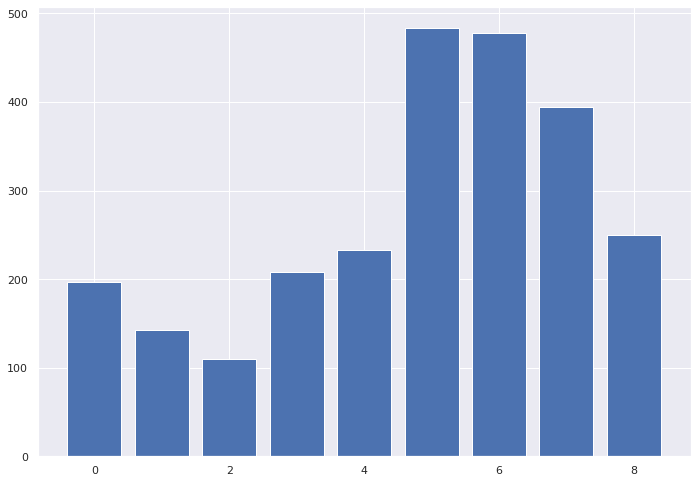

In [ ]:
y = df1[['continent']]
x = df1[['total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=1)

fs = SelectKBest(score_func=f_classif,k="all")
fs.fit(x_train,y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# Plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Dari seluruh feature yang di-tes, terlihat bahwa feature 5,6,7 memiliki nilai f-test paling baik. F-test sendiri adalah test statistik yang menghitung rasio antara nilai-nilai variansi. Semakin besar nilai f-test suatu fitur, berarti semakin relevan fitur tersebut terhadap tujuan terkait.

Maka dapat diasumsikan bahwa feature 5,6,7 ('total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred')merupakan salah satu feature yang paling baik digunakan untuk memprediksi benua.

## Dimensionality Reduction

Selain feature selection menggunakan ANOVA yg sudah dipraktekkan di atas ataupun PCA yang kemaren dilakukan, sebenarnya tetap ada cara untuk mengurangi kembali feature feature yang akan digunakan dalam modelnya nanti. Salah satu di antaranya adalah Random Forests.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
from sklearn.ensemble import RandomForestRegressor

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(df1['country'])

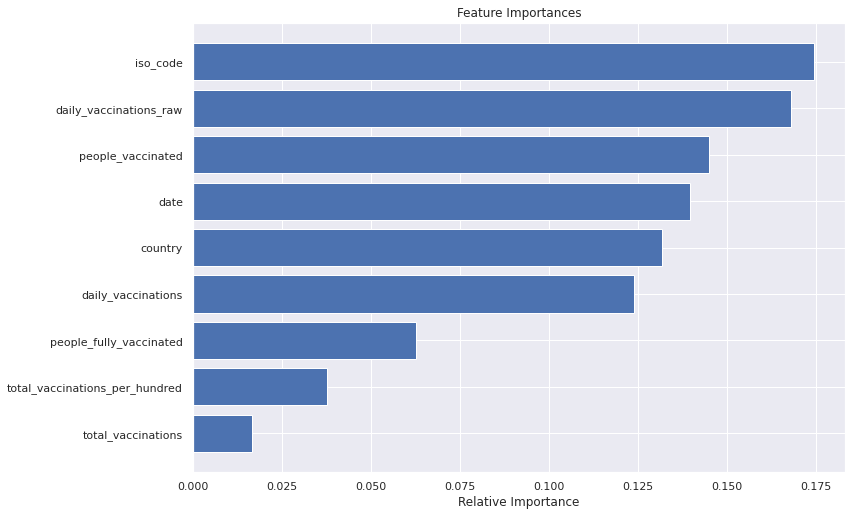

In [ ]:
x = df1[['total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']]


model = RandomForestRegressor(random_state=1, max_depth=10)

model.fit(x,y)
#y_coded = encoder.fit_transform(y)
features = df1.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=1)


Ini berarti untuk menentukan nilai kolom negara, maka fitur yang paling berpengaruh atau paling sesuai adalah ISO_Code (jelas,) daily_vaccinations_raw, dll.Fitur selain itu dapat direduksi/dikurangi secara perlahan.

Selain itu, ada juga cara yang dapat digunakan dengan mengkalkulasikan melewati filter Low Variance dan filter High Correlation. Cara melihat variansi dan korelasi adalah:


In [ ]:
df1.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


total_vaccinations                     5.185763e+16
people_vaccinated                      4.507151e+15
people_fully_vaccinated                2.581810e+15
daily_vaccinations_raw                 1.431252e+12
daily_vaccinations                     1.344754e+12
total_vaccinations_per_hundred         4.342409e+03
people_vaccinated_per_hundred          8.895894e+02
people_fully_vaccinated_per_hundred    8.164246e+02
daily_vaccinations_per_million         1.644898e+07
Rate_of_Growth                         1.942852e-03
year                                   1.373214e-01
month                                  1.247503e+01
day                                    7.777219e+01
dtype: float64

In [ ]:
df1.corr()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,Rate_of_Growth,year,month,day
total_vaccinations,1.000000,0.482090,0.526867,0.675914,0.708738,0.166869,-0.005702,0.002839,0.051754,-0.053725,0.091503,0.034282,-0.002491
people_vaccinated,0.482090,1.000000,0.855195,0.411242,0.431134,0.098384,0.149798,0.098735,0.042264,-0.056209,0.087826,0.045965,-0.000866
people_fully_vaccinated,0.526867,0.855195,1.000000,0.363198,0.378718,0.149703,0.155790,0.160533,0.038285,-0.061417,0.119794,0.037100,-0.000067
daily_vaccinations_raw,0.675914,0.411242,0.363198,1.000000,0.962854,0.047053,-0.050245,-0.061552,0.129190,-0.024654,-0.005930,0.042210,0.006475
daily_vaccinations,0.708738,0.431134,0.378718,0.962854,1.000000,0.051576,-0.050508,-0.062773,0.136963,-0.027365,-0.001274,0.044439,0.001825
total_vaccinations_per_hundred,0.166869,0.098384,0.149703,0.047053,0.051576,1.000000,0.873454,0.910372,0.245334,-0.324020,0.452234,0.177431,-0.003131
people_vaccinated_per_hundred,-0.005702,0.149798,0.155790,-0.050245,-0.050508,0.873454,1.000000,0.902236,0.310456,-0.319036,0.313700,0.245732,-0.002040
people_fully_vaccinated_per_hundred,0.002839,0.098735,0.160533,-0.061552,-0.062773,0.910372,0.902236,1.000000,0.173078,-0.308713,0.386662,0.220501,-0.002443
daily_vaccinations_per_million,0.051754,0.042264,0.038285,0.129190,0.136963,0.245334,0.310456,0.173078,1.000000,-0.027254,-0.059059,0.071179,0.014860
Rate_of_Growth,-0.053725,-0.056209,-0.061417,-0.024654,-0.027365,-0.324020,-0.319036,-0.308713,-0.027254,1.000000,-0.201654,-0.191176,0.015721


Dengan adanya pembatas/filter di nilai korelasi tinggi/variansi rendah tertentu, maka seluruh proses yang melibatkan keduanya susah diberi aman dan sepertinya tidak akan sukses.

## Penanganan Null Value

In [ ]:
#Counting how many null values in each column
df1.isna().sum(axis = 0)

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     40103
people_vaccinated                      42338
people_fully_vaccinated                44857
daily_vaccinations_raw                 47943
daily_vaccinations                       279
total_vaccinations_per_hundred         40103
people_vaccinated_per_hundred          42338
people_fully_vaccinated_per_hundred    44857
daily_vaccinations_per_million           279
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

Melihat dari pendeskripsian kolom-kolom yang ada di dalam dataset di atas, dapat dilihat bahwa ada sekitar 9 kolom yang memiliki banyak nilai NaN atau Null. Maka dari itu perlu ditentukan penanganan bagi mereka bagaimana.

In [ ]:
df1.sample(axis='rows')

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
81161,Yemen,YEM,2021-11-21,NaN,NaN,NaN,NaN,1926.0,NaN,NaN,NaN,63.0,"Johnson&Johnson, Oxford/AstraZeneca, Sinovac",World Health Organization,https://covid19.who.int/


Penanganan pertama adalah dengan secara sederhana menghapus seluruh baris yang beratribut NaN

In [ ]:
df1_nonan = df1.dropna()

In [ ]:
df1_nonan

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.49,1.20,0.29,163.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
101,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,4015.0,5285.0,1.58,1.21,0.37,133.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
339,Afghanistan,AFG,2022-01-27,5081064.0,4517380.0,3868832.0,6868.0,9802.0,12.76,11.34,9.71,246.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
417,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
499,Albania,ALB,2021-05-11,622507.0,440921.0,181586.0,9548.0,12160.0,21.67,15.35,6.32,4233.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81971,Zimbabwe,ZWE,2022-03-03,7921113.0,4372925.0,3406482.0,10373.0,8903.0,52.48,28.97,22.57,590.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81972,Zimbabwe,ZWE,2022-03-04,7930621.0,4374896.0,3408609.0,9508.0,8603.0,52.55,28.99,22.59,570.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81973,Zimbabwe,ZWE,2022-03-05,7936145.0,4377373.0,3410340.0,5524.0,8458.0,52.58,29.00,22.60,560.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81974,Zimbabwe,ZWE,2022-03-06,7938362.0,4378029.0,3410960.0,2217.0,8017.0,52.60,29.01,22.60,531.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [ ]:
df1.loc[df1['country'] == "Afghanistan"]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Afghanistan,AFG,2022-03-02,NaN,NaN,NaN,NaN,13825.0,NaN,NaN,NaN,347.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
374,Afghanistan,AFG,2022-03-03,NaN,NaN,NaN,NaN,12578.0,NaN,NaN,NaN,316.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
375,Afghanistan,AFG,2022-03-04,NaN,NaN,NaN,NaN,11332.0,NaN,NaN,NaN,284.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
376,Afghanistan,AFG,2022-03-05,NaN,NaN,NaN,NaN,10086.0,NaN,NaN,NaN,253.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [ ]:
df1_nonan[df1_nonan['country'] == "Afghanistan"]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.49,1.20,0.29,163.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
101,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,4015.0,5285.0,1.58,1.21,0.37,133.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
339,Afghanistan,AFG,2022-01-27,5081064.0,4517380.0,3868832.0,6868.0,9802.0,12.76,11.34,9.71,246.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


Tetapi seperti dapat dilihat di atas, hal ini akan menyebabkan banyaknya data yang terhapus dari suatu dataset. Maka dari itu perlu cara yang lebih efektif dalam menangani nilai NaN/Null dari dataset di atas.Langkah pertama yang akan diambil berdasar pada salah satu query di atas yaitu kolom 'daily_vaccinations'

In [ ]:
#Melihat karakteristik row dengan data 'daily_vaccinations' = 0.0
df1[(df1['daily_vaccinations'].isna())]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
378,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
794,Algeria,DZA,2021-01-29,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://africacdc.org/covid-19-vaccination/
1182,Algeria,DZA,2022-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://africacdc.org/covid-19-vaccination/
1183,Algeria,DZA,2022-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://africacdc.org/covid-19-vaccination/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80201,Wales,OWID_WLS,2021-01-10,86118.0,86039.0,79.0,NaN,NaN,2.72,2.71,0.0,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...
80622,Wallis and Futuna,WLF,2021-03-23,1286.0,1286.0,NaN,NaN,NaN,11.59,11.59,NaN,NaN,Moderna,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
80965,Yemen,YEM,2021-05-09,18555.0,18555.0,NaN,NaN,NaN,0.06,0.06,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Sinovac",World Health Organization,https://covid19.who.int/
81267,Zambia,ZMB,2021-04-14,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Sinopharm...",Government of Zambia,https://rtc-planning.maps.arcgis.com/apps/dash...


Berdasarkan query di atas, maka dapat dilihat bahwa row-row yang memiliki nilai 'daily_vaccinations' = NaN cenderung memiliki data NaN pula yang banyak di kolom-kolom lainnya. Dengan asumsi bahwa ini berarti data belum valid, maka data tersebut dapat di drop.

In [ ]:
df1_alt = df1.drop(df1[df1.daily_vaccinations.isna()].index)
df1_alt

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81971,Zimbabwe,ZWE,2022-03-03,7921113.0,4372925.0,3406482.0,10373.0,8903.0,52.48,28.97,22.57,590.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81972,Zimbabwe,ZWE,2022-03-04,7930621.0,4374896.0,3408609.0,9508.0,8603.0,52.55,28.99,22.59,570.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81973,Zimbabwe,ZWE,2022-03-05,7936145.0,4377373.0,3410340.0,5524.0,8458.0,52.58,29.00,22.60,560.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81974,Zimbabwe,ZWE,2022-03-06,7938362.0,4378029.0,3410960.0,2217.0,8017.0,52.60,29.01,22.60,531.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


Asumsi kedua yang akan digunakan adalah bahwa data total vaksinasi seharusnya selalu lengkap, karena ia merupakan data kumulatif dari seluruh data-data sebelumnya. Yang utamanya ingin dilihat dari dataset ini juga adalah data-data total_vaccinations yang terjadi, sehingga data dengan kolom 'total_vaccinations' == NaN tidak dapat dikalkulasikan pula. Maka dari itu, diasumsikan bahwa data dengan total_vaccinations == NaN adalah data yang korup.

In [ ]:
df1_alt = df1_alt.drop(df1_alt[df1_alt.total_vaccinations.isna()].index)
df1_alt

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,2862.0,0.14,0.14,NaN,72.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,3000.0,0.30,0.30,NaN,75.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,8000.0,0.60,0.60,NaN,201.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
78,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,NaN,13921.0,1.27,1.13,0.14,349.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81971,Zimbabwe,ZWE,2022-03-03,7921113.0,4372925.0,3406482.0,10373.0,8903.0,52.48,28.97,22.57,590.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81972,Zimbabwe,ZWE,2022-03-04,7930621.0,4374896.0,3408609.0,9508.0,8603.0,52.55,28.99,22.59,570.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81973,Zimbabwe,ZWE,2022-03-05,7936145.0,4377373.0,3410340.0,5524.0,8458.0,52.58,29.00,22.60,560.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81974,Zimbabwe,ZWE,2022-03-06,7938362.0,4378029.0,3410960.0,2217.0,8017.0,52.60,29.01,22.60,531.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [ ]:
#Hitung kembali data-data yang masih memiliki nilai NaN
df1_alt.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

Terakhir, dengan asumsi bahwa seluruh data yang sekarang diperhitungkan sudah valid, maka kita buat asumsi ketiga yaitu data-data dengan nilai NaN yang tersisa adalah data yang memang saat tercatat mereka tidak mengalami penambahan. Maka dari itu, nilai dari data dengan NaN yang tersisa adalah 0.

In [ ]:
df1_alt = df1_alt.fillna(0)

In [ ]:
#Hitung kembali data-data yang masih memiliki nilai NaN
df1_alt.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [ ]:
#Mengganti dataset asli dengan dataset alternatif
df1 = df1_alt
df1.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

## Statistik Data

In [ ]:
df1.shape

(2999, 5)

In [ ]:
#Describing all numerical data
df1.describe()

,review_count,Last1MothNominal
count,2999.000000,2.999000e+03
mean,132.564188,7.832452e+06
std,521.055133,5.498988e+07
min,0.000000,2.000000e+03
25%,2.000000,3.587500e+05
50%,9.000000,1.220000e+06
75%,51.000000,4.176000e+06
max,11058.000000,1.994077e+09


In [ ]:
#Showing variance of all numerical data
df1.var()

TypeError: could not convert string to float: '-6.272.544'

In [ ]:
#Describing all data
df1.describe(include= 'all')

,review_count,review_rating,latitude,longitude,TotalTransaction,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal
count,2999.000000,2999,2999,2999,2999.000000,2.999000e+03,2999.000000,2.999000e+03
unique,NaN,33,2710,2714,NaN,NaN,NaN,NaN
top,NaN,5.000.000,-6.298.126,106.713.522,NaN,NaN,NaN,NaN
freq,NaN,743,8,8,NaN,NaN,NaN,NaN
mean,132.564188,NaN,NaN,NaN,330.018339,2.603235e+07,97.023341,7.832452e+06
std,521.055133,NaN,NaN,NaN,1067.788660,1.530137e+08,339.683365,5.498988e+07
min,0.000000,NaN,NaN,NaN,10.000000,4.678500e+04,1.000000,2.000000e+03
25%,2.000000,NaN,NaN,NaN,33.000000,1.407250e+06,9.000000,3.587500e+05
50%,9.000000,NaN,NaN,NaN,87.000000,4.451000e+06,25.000000,1.220000e+06
75%,51.000000,NaN,NaN,NaN,260.000000,1.540096e+07,72.000000,4.176000e+06


In [ ]:
#Counting how many null values in each column
df1.isna().sum(axis = 0)

review_count               0
review_rating              0
latitude                   0
longitude                  0
TotalTransaction           0
TotalNominalTransaction    0
Last1MonthTransaction      0
Last1MothNominal           0
dtype: int64

In [ ]:
#Calculating how many values are not null in each column
df1.count()

review_count               2999
review_rating              2999
latitude                   2999
longitude                  2999
TotalTransaction           2999
TotalNominalTransaction    2999
Last1MonthTransaction      2999
Last1MothNominal           2999
dtype: int64

In [ ]:
#Calculating correlation between each feature
df1.corr()

ValueError: could not convert string to float: '4.000.000'

In [ ]:
#Calculating covariance between each feature
df1.cov()

A positive and greater covariance number means a more direct relationship between two variables.

In [ ]:
#Calculating skewness of each feature
df1.skew()

A positive skew score means that the mean is greater than the median, which means that the data/column is imbalanced. The same thing works too for negative skew scores.

In [ ]:
#Calculating kurtosis of each feature
df1.kurt()

A high level of kurtosis means there is a high chance that the extreme points of a skewed data set would have a larger difference than its normal values.

In [ ]:
#List of all categorical columns
categoricals = df1.select_dtypes(include=['object']).columns.tolist()
#List of all numerical columns
numericals = df1.select_dtypes(exclude=['object']).columns.tolist()

In [ ]:
#Describe all categorical columns
for column in categoricals:
  print(df1[column].describe())

In [ ]:
df1.sample(5)

In [ ]:
#Verifikasi tipe data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_count             2999 non-null   int64 
 1   review_rating            2999 non-null   object
 2   latitude                 2999 non-null   object
 3   longitude                2999 non-null   object
 4   TotalTransaction         2999 non-null   int64 
 5   TotalNominalTransaction  2999 non-null   int64 
 6   Last1MonthTransaction    2999 non-null   int64 
 7   Last1MothNominal         2999 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 187.6+ KB
